In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np


In [177]:
data = pd.read_csv('./dataset/dataset.csv')
data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


<Axes: xlabel='total_bill', ylabel='tip'>

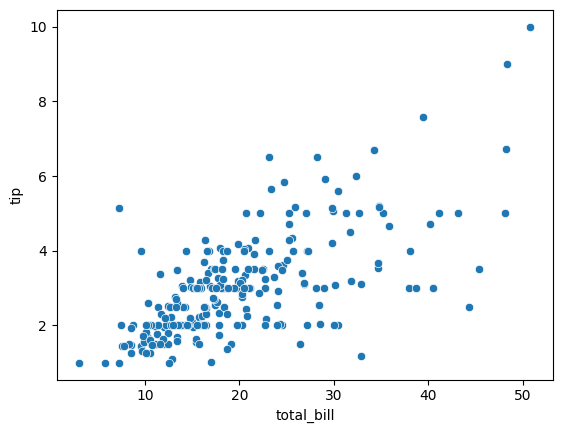

In [178]:
sns.scatterplot(data=data, x="total_bill", y="tip")

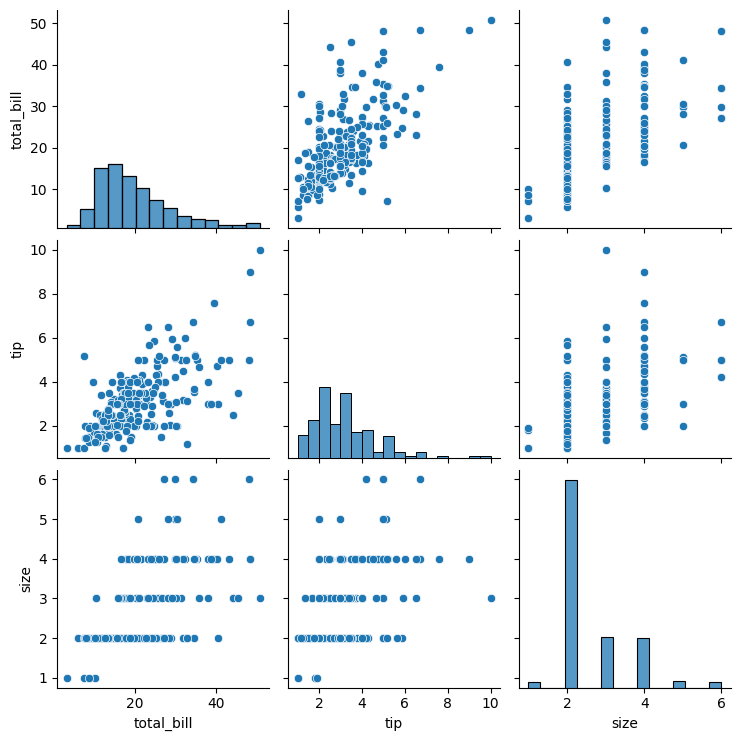

In [179]:
sns.pairplot(data)

<Axes: >

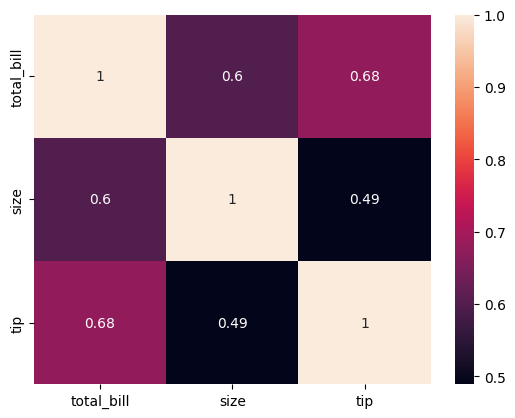

In [180]:
sns.heatmap(data[['total_bill','size','tip']].corr(),annot=True)

In [181]:
df_data = data.drop(columns=['tip'])
df_target = data['tip']

label_encoder = LabelEncoder()
df_data['sex'] = label_encoder.fit_transform(data['sex'])
df_data['smoker'] = label_encoder.fit_transform(data['smoker'])
df_data['day'] = label_encoder.fit_transform(data['day'])
df_data['time'] = label_encoder.fit_transform(data['time'])

X = df_data
X = sm.add_constant(X)
y = df_target

model = sm.OLS(y, X).fit()

from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2036274510126597
P-value: 0.15798464222013167


In [182]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = data.drop(columns='tip')
y = data['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(kernel='linear'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
results_df

,MSE,R2
Linear Regression,0.703357,0.437302
Ridge,0.700748,0.439389
Lasso,0.590853,0.527307
Decision Tree,1.255194,-0.004178
Random Forest,0.919672,0.264246
SVR,0.652453,0.478025
KNN,0.876373,0.298886


In [183]:
#since lasso has the lowest mean squared error and highest R2 score, we will use lasso for our model

rf_model = Lasso(alpha=0.1)
rf_model.fit(X_train, y_train)
feature_importance = pd.Series(rf_model.coef_, index=X.columns)
significant_features = feature_importance[feature_importance != 0].sort_values(ascending=False)
print("Significant factor:", significant_features)


Significant factor: size          0.108081
total_bill    0.099099
dtype: float64


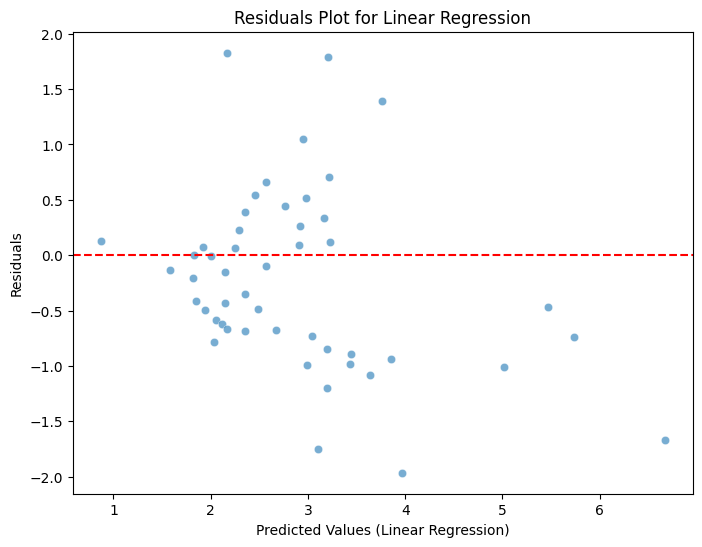

In [184]:
"""Residual Plots"""

#Linear Regression

predictions_lr = models['Linear Regression'].predict(X_test)
residuals_lr = y_test - predictions_lr
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_lr, y=residuals_lr, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values (Linear Regression)")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Linear Regression")
plt.show()

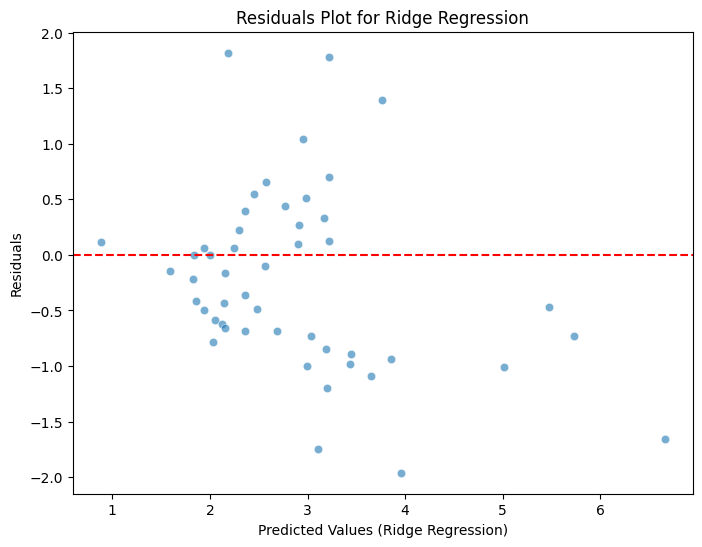

In [185]:
#Ridge Regression

predictions_ridge = models['Ridge'].predict(X_test)
residuals_ridge = y_test - predictions_ridge
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_ridge, y=residuals_ridge, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values (Ridge Regression)")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Ridge Regression")
plt.show()

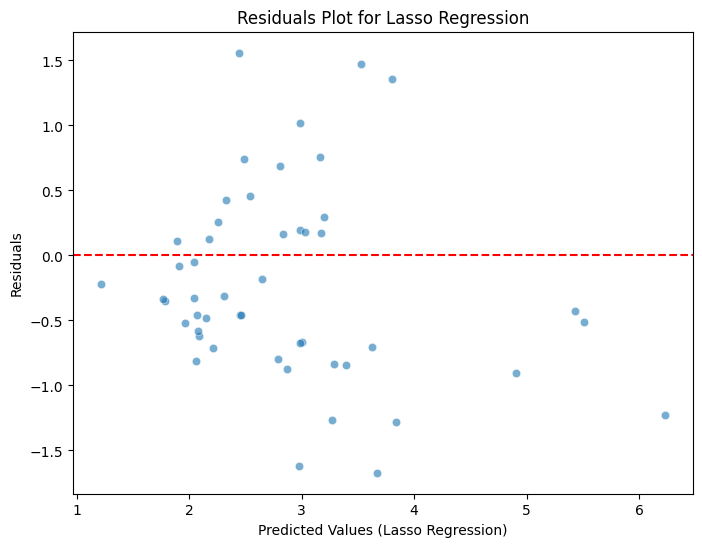

In [186]:
#Lasso Regression

predictions_lasso = models['Lasso'].predict(X_test)
residuals_lasso = y_test - predictions_lasso
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_lasso, y=residuals_lasso, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values (Lasso Regression)")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Lasso Regression")
plt.show()

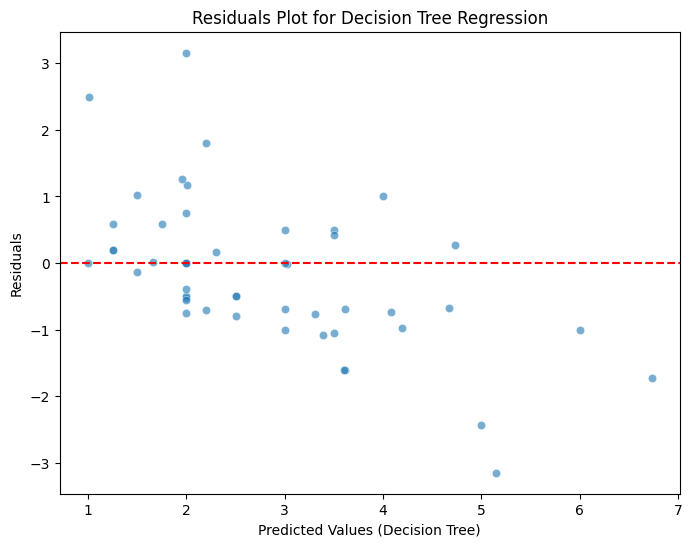

In [187]:
# Decision Tree Regression 

predictions_tree = models['Decision Tree'].predict(X_test)
residuals_tree = y_test - predictions_tree
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_tree, y=residuals_tree, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values (Decision Tree)")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Decision Tree Regression")
plt.show()

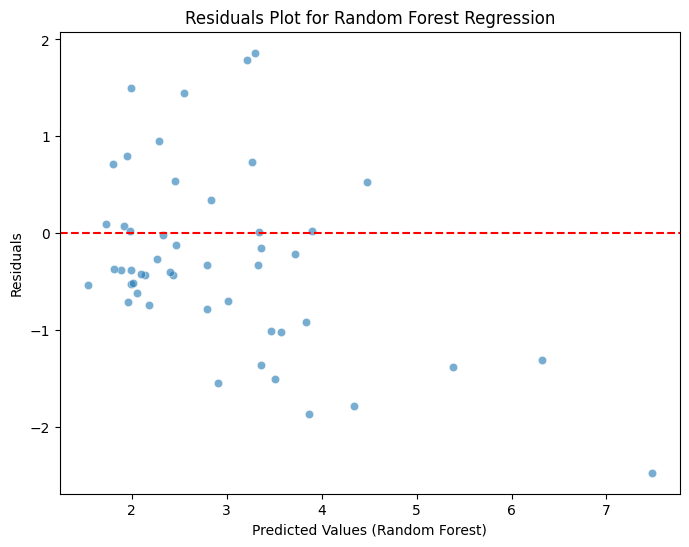

In [188]:
# Random Forest Regression 

predictions_forest = models['Random Forest'].predict(X_test)
residuals_forest = y_test - predictions_forest
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_forest, y=residuals_forest, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values (Random Forest)")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Random Forest Regression")
plt.show()

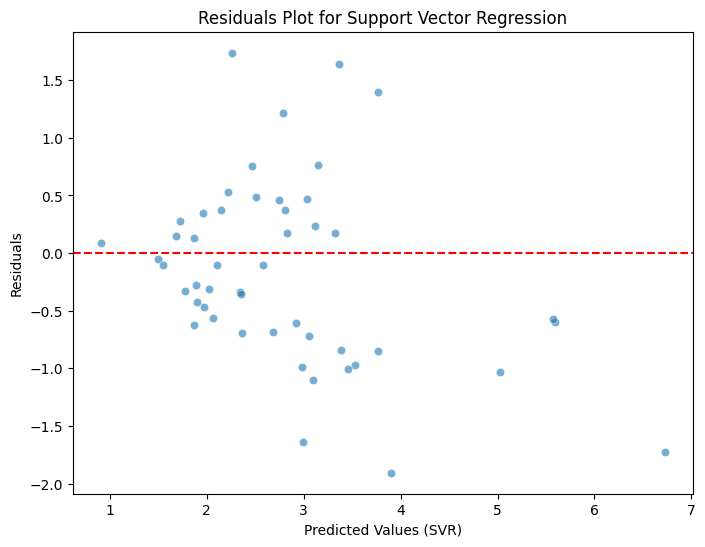

In [189]:
# Support Vector Regression 

predictions_svr = models['SVR'].predict(X_test)
residuals_svr = y_test - predictions_svr
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_svr, y=residuals_svr, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values (SVR)")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Support Vector Regression")
plt.show()

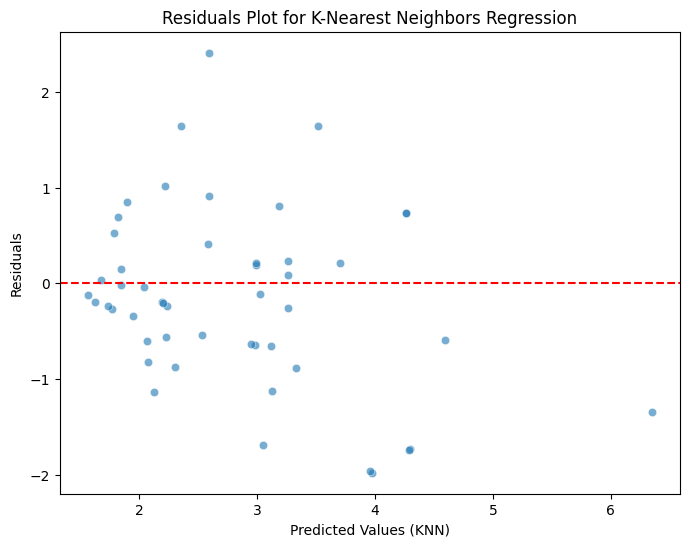

In [190]:
# KNN Regression

predictions_knn = models['KNN'].predict(X_test)
residuals_knn = y_test - predictions_knn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_knn, y=residuals_knn, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values (KNN)")
plt.ylabel("Residuals")
plt.title("Residuals Plot for K-Nearest Neighbors Regression")
plt.show()